In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.patches as mpatches
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PolyCollection
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

directory = ''


In [124]:

# region_name = 'easteu'
var_name = "mortality_fraction"
var_ref = {
    "africa":28.3536,
    "asiapacific":25.5557,
    "easteu":63.5559,
    "lac":42.1324,
    "westeu":59.9552
}
"""
Life Expectancy Normal[Regions]=
    28.3536,
    25.5557,
    63.5559,
    42.1324,
    59.9552
"""
for region_name in var_ref.keys():
    df_mor = pd.read_csv(f"{var_name}_{region_name}.csv")
    #df_mor = pd.read_excel(directory+'MOR.xlsx')

    df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0', 'L','k', 'x0', 'r2'])

    def logistic_mor(x,L0,L,k,x0):
        exp_term = np.exp(-k * (x/var_ref[region_name]-x0))  
        return L0+L / (1+ exp_term)

    print(f"Start running calibration of {var_name} for {region_name}")
    # runing time depends on the maximal time; currently set 50000 times
    # df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2']).dropna()
    x = df_mor.iloc[42,1:].dropna().values.tolist()
    for i in range(42):
        y=df_mor.iloc[i,1:].dropna().values.tolist()
        try:
            n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=50000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
        except RuntimeError as e:
            print(1)
        df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
        y_pred = logistic_mor(np.array(x), *n_par)
        df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)
    
    df_par.to_csv(f"cal_result_{var_name}_{region_name}.csv")
    print(f"Finish running calibration of {var_name} for {region_name}")


Start running calibration of mortality_fraction for africa
Finish running calibration of mortality_fraction for africa
Start running calibration of mortality_fraction for asiapacific
Finish running calibration of mortality_fraction for asiapacific
Start running calibration of mortality_fraction for easteu
Finish running calibration of mortality_fraction for easteu
Start running calibration of mortality_fraction for lac
Finish running calibration of mortality_fraction for lac
Start running calibration of mortality_fraction for westeu
Finish running calibration of mortality_fraction for westeu


In [118]:
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L','L0', 'k', 'x0', 'r2'])

In [119]:
def logistic_mor(x,L0,L,k,x0):
    exp_term = np.exp(-k * (x/28-x0))  #  what is 28?
    return L0+L / (1+ exp_term)

In [70]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2'])
x = df_mor.iloc[42,1:].values.tolist()
for i in range(42):
    y=df_mor.iloc[i,1:].values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],
                                                                         [np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)

In [71]:
df_par

,L0,L,k,x0,r2
Age,,,,,
"Mortality fraction[LAC,female,""0-4""]",-0.001089,2049.42449,-2.95494,-2.049909,0.995603
"Mortality fraction[LAC,female,""5-9""]",-0.000383,254.986815,-2.570472,-2.318762,0.992715
"Mortality fraction[LAC,female,""10-14""]",-0.000114,198.780122,-2.283302,-3.043409,0.990114
"Mortality fraction[LAC,female,""15-19""]",0.000013,211.113359,-2.311368,-2.900823,0.987485
"Mortality fraction[LAC,female,""20-24""]",-0.00015,264.778607,-2.090715,-3.393246,0.993795
"Mortality fraction[LAC,female,""25-29""]",-0.000251,290.06341,-1.968757,-3.691393,0.995166
"Mortality fraction[LAC,female,""30-34""]",-0.000515,279.790108,-1.712378,-4.413511,0.994742
"Mortality fraction[LAC,female,""35-39""]",-0.001261,184.02997,-1.381725,-5.420925,0.995504
"Mortality fraction[LAC,female,""40-44""]",-0.002295,164.147455,-1.077995,-7.148133,0.993042


In [82]:
def logistic_mor(x,L0,L,k,x0):
    exp_term = np.exp(-k * (x/28.785-x0))
    return L0+L / (1+ exp_term)

In [120]:
# runing time depends on the maximal time; currently set 50000 times
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2']).dropna()
x = df_mor.iloc[42,1:].dropna().values.tolist()
for i in range(42):
    y=df_mor.iloc[i,1:].dropna().values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=50000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)

In [121]:
df_par

df_par.to_csv(f"cal_result_{var_name}_{region_name}.csv")

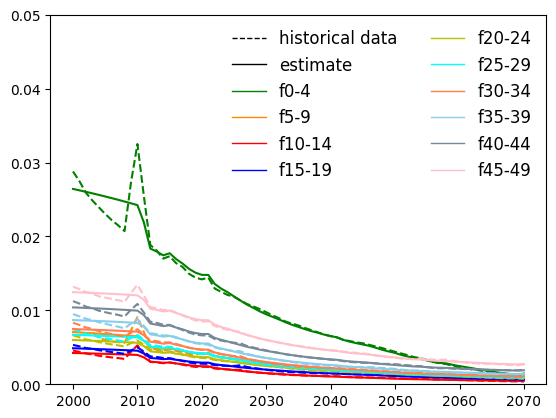

In [48]:
from matplotlib.lines import Line2D
c=['g','#FF8C00','r','b','y','#00FFFF','#FF7F50','#87CEEB','#778899','#FFC0CB']
hislabel=['f0-4','f5-9','f10-14','f15-19','f20-24','f25-29','f30-34','f35-39','f40-44','f45-49']
plt.plot()
x1=[]
for i in range(71):
    x1.append(2000+i)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2'])
x = df_mor.iloc[42,1:].values.tolist()
for i in range(10):
    y=df_mor.iloc[i,1:].values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)
    plt.plot(x1,y,linestyle='--',color=c[i-10])
    plt.plot(x1,y_pred,linestyle='-',label='estimate',color=c[i-10])
    plt.ylim([0,0.05])
legend_elements = []
legend_elements.append(Line2D([0], [0],color='k',linestyle='--',lw=1,label='historical data'))
legend_elements.append(Line2D([0], [0],color='k',linestyle='-',lw=1,label='estimate'))
for i in range(10):
    legend_elements.append(Line2D([0], [0],color=c[i],linestyle='-',lw=1,label=hislabel[i]))
plt.legend(handles=legend_elements, frameon=False,ncol=2,fontsize=12)

In [61]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2']).dropna()
x = df_mor.iloc[42,1:].dropna().values.tolist()
for i in range(42):
    y=df_mor.iloc[i,1:].dropna().values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)

In [62]:
df_par

,L0,L,k,x0,r2
Age,,,,,
"Mortality fraction[EastEu,female,""0-4""]",0.000778,395.233433,-34.01275,1.984579,0.827698
"Mortality fraction[EastEu,female,""5-9""]",0.00015,548.437151,-20.002042,1.65534,0.827261
"Mortality fraction[EastEu,female,""10-14""]",0.000127,167.001015,-16.872608,1.580768,0.797304
"Mortality fraction[EastEu,female,""15-19""]",0.000233,47.249135,-15.09963,1.600886,0.783156
"Mortality fraction[EastEu,female,""20-24""]",0.000346,84.850827,-15.11747,1.576629,0.774321
"Mortality fraction[EastEu,female,""25-29""]",0.000496,88.052843,-14.706541,1.559896,0.772148
"Mortality fraction[EastEu,female,""30-34""]",0.000803,90.408427,-15.568367,1.607752,0.750389
"Mortality fraction[EastEu,female,""35-39""]",0.001208,107.043902,-14.641238,1.561431,0.741739
"Mortality fraction[EastEu,female,""40-44""]",0.001583,99.076939,-10.749559,1.322975,0.78673


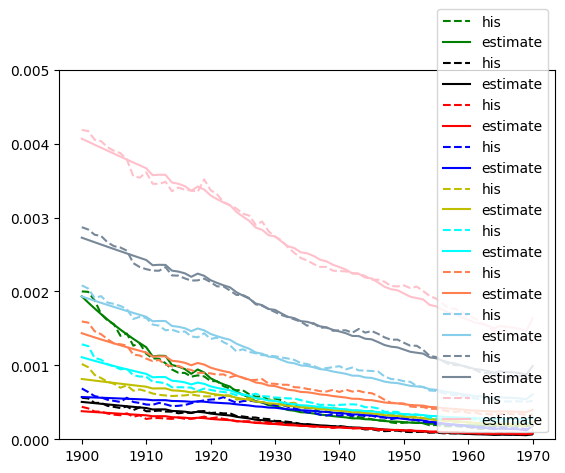

In [125]:
c=['g','k','r','b','y','#00FFFF','#FF7F50','#87CEEB','#778899','#FFC0CB']
plt.plot()
x1=[]
for i in range(71):
    x1.append(1900+i)
x2=[]
for i in range(71):
    x2.append(1900+i)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2'])
x = df_mor.iloc[42,1:].dropna().values.tolist()
for i in range(10):
    y=df_mor.iloc[i,1:].dropna().values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)
    plt.plot(x2,y,linestyle='--',label='his',color=c[i])
    plt.plot(x1,y_pred,linestyle='-',label='estimate',color=c[i])
    plt.ylim([0,0.005])
plt.legend()

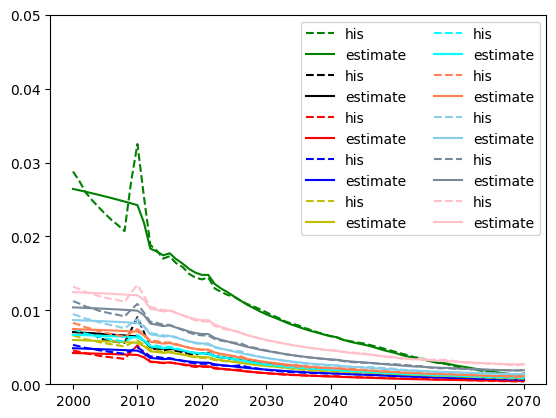

In [52]:
c=['g','k','r','b','y','#00FFFF','#FF7F50','#87CEEB','#778899','#FFC0CB']
plt.plot()
x1=[]
for i in range(71):
    x1.append(2000+i)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L0','L', 'k', 'x0', 'r2'])
x = df_mor.iloc[42,1:].values.tolist()
hislabel=['f0-4','f5-9','f10-14','f15-19','f20-24','f25-29','f30-34','f35-39','f40-44','f45-49','f50-54','f55-59',
         'f60-64','f65-69','f70-74','f75-79','f80-84','f85-89','f90-94','f95-99','f100+',
         'm0-4','m5-9','m10-14','m15-19','m20-24','m25-29','m30-34','m35-39','m40-44','m45-49','m50-54','m55-59',
         'm60-64','m65-69','m70-74','m75-79','m80-84','m85-89','m90-94','m95-99','m100+']
for i in range(10):
    y=df_mor.iloc[i,1:].values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)
    plt.plot(x1,y,linestyle='--',label='his',color=c[i-10])
    plt.plot(x1,y_pred,linestyle='-',label='estimate',color=c[i-10])
    plt.ylim([0,0.05])
plt.legend(ncol=2)

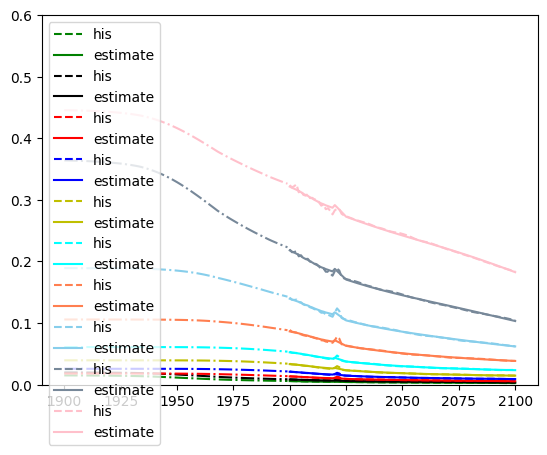

In [15]:
x2=[]
for i in range(100):
    x2.append(1900+i)
yy=[32.96,32.97,32.99,33.02,33.05,33.08,33.12,33.16,33.2,33.25,33.3,33.36,33.41,33.48,33.54,33.61,33.69,33.76,33.85,33.94,34.03,34.13,
   34.23,34.34,34.46,34.59,34.73,34.87,35.03,35.19,35.37,35.57,35.77,35.99,36.24,36.53,36.84,37.17,37.52,37.89,38.27,38.68,39.1,39.54,
   40,40.47,40.96,41.47,41.99,42.53,43.07,43.63,44.2,44.77,45.36,45.95,46.54,47.14,47.75,48.35,48.96,49.57,50.17,50.78,51.38,51.99,52.58,
   53.18,53.77,54.29,54.78,55.27,55.74,56.21,56.66,57.1,57.53,57.96,58.37,58.79,59.19,59.59,59.98,60.36,60.74,61.1,61.46,61.81,62.16,
   62.52,62.86,63.2,63.52,63.82,64.12,64.41,64.7,64.98,65.25,65.52,65.77,66.02,66.26,66.5,66.73,66.95,67.15,67.33,67.49,67.64,67.79,
   67.94,68.09,68.23,68.36,68.49,68.58,68.67,68.74,68.79,69.02,69.08,69.14,69.17,69.19,69.21,69.23,69.24,69.26,69.27,69.29,69.3,69.31,
   69.32,69.33,69.34,69.32,69.3,69.29,69.27,69.26,69.25,69.24,69.23,69.23,69.23,69.23,69.24,69.25,69.26,69.28,69.3,69.32,69.35,69.39,
   69.42,69.46,69.51,69.56,69.62,69.68,69.74,69.81,69.88,69.95,70.02,70.1,70.18,70.26,70.35,70.44,70.5,70.56,70.61,70.66,70.72,70.78,
   70.84,70.9,70.97,71.04,71.11,71.19,71.27,71.35,71.44,71.52,71.61,71.7,71.8,71.89,71.98,72.08,72.17,72.26,72.35,72.44,72.53,72.62,72.7,72.78]


c=['g','k','r','b','y','#00FFFF','#FF7F50','#87CEEB','#778899','#FFC0CB']
plt.plot()
x1=[]
for i in range(101):
    x1.append(2000+i)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
x = df_mor.iloc[42,1:].values.tolist()
lebefore=[32.96,32.97,32.99,33.02,33.05,33.08,33.12,33.16,33.2,33.25,33.3,33.36,33.41,33.48,33.54,33.61,33.69,33.76,33.85,33.94,34.03,34.13,
   34.23,34.34,34.46,34.59,34.73,34.87,35.03,35.19,35.37,35.57,35.77,35.99,36.24,36.53,36.84,37.17,37.52,37.89,38.27,38.68,39.1,39.54,
   40,40.47,40.96,41.47,41.99,42.53,43.07,43.63,44.2,44.77,45.36,45.95,46.54,47.14,47.75,48.35,48.96,49.57,50.17,50.78,51.38,51.99,52.58,
   53.18,53.77,54.29,54.78,55.27,55.74,56.21,56.66,57.1,57.53,57.96,58.37,58.79,59.19,59.59,59.98,60.36,60.74,61.1,61.46,61.81,62.16,
   62.52,62.86,63.2,63.52,63.82,64.12,64.41,64.7,64.98,65.25,65.52]
ybefore=[]
for i in range(10,20):
    y=df_mor.iloc[i,1:].values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[np.inf,np.inf,0,np.inf]))
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L0','L', 'k','x0']] = n_par
    y_pred1 = logistic_mor(np.array(x), *n_par)
    y_pred2 = logistic_mor(np.array(lebefore), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)
    plt.plot(x1,y,linestyle='--',label='his',color=c[i-10])
    plt.plot(x1,y_pred1,linestyle='-',label='estimate',color=c[i-10])
    plt.plot(x2,y_pred2,linestyle='-.',color=c[i-10])
    ybefore.append(y_pred2)
    plt.ylim([0,0.6])
plt.legend()

In [16]:
ybefore

[array([0.01490432, 0.01490044, 0.01489268, 0.01488104, 0.01486942,
        0.0148578 , 0.01484232, 0.01482686, 0.0148114 , 0.01479211,
        0.01477283, 0.01474973, 0.0147305 , 0.01470362, 0.01468061,
        0.0146538 , 0.01462322, 0.0145965 , 0.01456221, 0.01452798,
        0.01449382, 0.01445595, 0.01441816, 0.01437669, 0.01433155,
        0.0142828 , 0.01423045, 0.01417825, 0.0141188 , 0.01405956,
        0.01399316, 0.01391969, 0.01384654, 0.01376645, 0.0136759 ,
        0.01357149, 0.0134606 , 0.0133434 , 0.01322001, 0.0130906 ,
        0.01295878, 0.01281779, 0.01267467, 0.01252614, 0.01237239,
        0.01221689, 0.01205648, 0.01189135, 0.01172487, 0.011554  ,
        0.01138514, 0.01121213, 0.01103821, 0.01086646, 0.01069094,
        0.01051768, 0.01034665, 0.01017499, 0.01000278, 0.00983563,
        0.00966794, 0.00950249, 0.00934191, 0.00918082, 0.00902446,
        0.0088676 , 0.00871787, 0.00856759, 0.00842175, 0.00829476,
        0.00817643, 0.00805937, 0.00794827, 0.00

In [17]:
# 5-9

dd2 = df_mor[['life expectancy', 'female55-59']].dropna()
try:
    n_par, n_cov = curve_fit(logistic_mor, dd2['life expectancy'],dd2['female55-59'],maxfev=10000)
except RuntimeError as e:
    print(driver)
df_par.loc['female55-59', ['L', 'k', 'x0']] = n_par
y_pred = logistic_mor(dd2['female55-59'], *n_par)
df_par.loc['female55-59', 'r2'] = r2_score(dd2['life expectancy'], y_pred)


KeyError: "None of [Index(['life expectancy', 'female55-59'], dtype='object')] are in the [columns]"

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df_par = pd.DataFrame(index=df_mor['Age'], columns=['L','L0', 'k', 'x0', 'r2'])
x = df_mor.iloc[42,1:].values.tolist()
for i in range(37,39):
    y=df_mor.iloc[i,1:].values.tolist()
    try:
        n_par, n_cov = curve_fit(logistic_mor,x, y, maxfev=10000)
    except RuntimeError as e:
        print(1)
    df_par.loc[df_mor['Age'][i], ['L','L0', 'k','x0']] = n_par
    y_pred = logistic_mor(np.array(x), *n_par)
    df_par.loc[df_mor['Age'][i], 'r2'] = r2_score(y, y_pred)

D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
